In [4]:
import pandas as pd

# ANALISIS DESCRIPTIvO
# ANALISIS DESCRIPTIvO
# ANALISIS DESCRIPTIvO
# ANALISIS DESCRIPTIvO
# ANALISIS DESCRIPTIvO



# Cargar datos
df = pd.read_csv("/content/df_final_limpio1206.csv")

# --- Preprocesamiento ---
df["fechaCobroBanco"] = pd.to_datetime(df["fechaCobroBanco"], errors='coerce', dayfirst=True)
df["fechaCreacionLista"] = pd.to_datetime(df["fechaCreacionLista"], errors='coerce', dayfirst=True)
df["fechaEnvioCobro"] = pd.to_datetime(df["fechaEnvioCobro"], errors='coerce', dayfirst=True)

df["exitoCobro"] = df["montoCobrado"] > 0
df["dia_semana"] = df["fechaCobroBanco"].dt.day_name()

# --- 1. Tasa de éxito por banco ---
print("\n1. Tasa de éxito por banco")
print(
    df.groupby("Nombre")["exitoCobro"]
    .mean()
    .reset_index(name="tasa_exito")
    .sort_values(by="tasa_exito", ascending=False)
)

# --- 2. Tasa de éxito por tipo de envío ---
print("\n2. Tasa de éxito por tipo de envío")
print(
    df.groupby("TipoEnvio")["exitoCobro"]
    .mean()
    .reset_index(name="tasa_exito")
    .sort_values(by="tasa_exito", ascending=False)
)

# --- 3. Impacto financiero de cada respuesta del banco ---
print("\n3. Impacto por respuesta del banco")
print(
    df.groupby("idRespuestaBanco")["montoExigible"]
    .sum()
    .reset_index(name="monto_total_exigido")
    .sort_values(by="monto_total_exigido", ascending=False)
)

# --- 4. Relación montoExigible y éxito del cobro ---
print("\n4. Relación entre monto exigible y éxito")
print(df[["montoExigible", "exitoCobro"]].describe())

# --- 5. Tasa de éxito por día de la semana ---
print("\n5. Tasa de éxito por día de la semana")
print(
    df.groupby("dia_semana")["exitoCobro"]
    .mean()
    .reset_index(name="tasa_exito")
    .sort_values(by="tasa_exito", ascending=False)
)

# --- 6. Tasa de éxito por estrategia de cobro (idEmisora) ---
print("\n6. Tasa de éxito por estrategia de cobro")
print(
    df.groupby("idEmisora")["exitoCobro"]
    .mean()
    .reset_index(name="tasa_exito")
    .sort_values(by="tasa_exito", ascending=False)
)

# --- 7. Número de intentos por crédito ---
print("\n7. Intentos por crédito")
print(
    df.groupby("idCredito")["consecutivoCobro"]
    .count()
    .reset_index(name="intentos_totales")
    .sort_values(by="intentos_totales", ascending=False)
    .head(10)
)

# --- 8. Comparación entre monto a cobrar y monto cobrado ---
print("\n8. Comparación entre montoCobrar y montoCobrado")
print(df[["montoCobrar", "montoCobrado"]].describe())

<ipython-input-4-506975c59397>:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/df_final_limpio1206.csv")



1. Tasa de éxito por banco
                           Nombre  tasa_exito
18    SANTANDER CLABE TRADICIONAL    0.385356
12         BBVA CLABE TRADICIONAL    0.242288
15            BBVA CUENTA PARCIAL    0.230246
16        BBVA CUENTA TRADICIONAL    0.136691
5       BANORTE CLABE TRADICIONAL    0.108216
6         BANORTE CUENTA EN LINEA    0.088621
19              SANTANDER CUENTA     0.058608
11             BBVA CLABE PARCIAL    0.053820
7      BANORTE CUENTA TRADICIONAL    0.053801
9        BBVA CLABE INTERBANCARIA    0.048722
10            BBVA CLABE MATUTINO    0.033716
1                  BANAMEX CUENTA    0.027183
8             BBVA CLABE EN LINEA    0.024331
0       BANAMEX CLABE TRADICIONAL    0.024213
13           BBVA CUENTA EN LINEA    0.023671
3   BANAMEX TRADICIONAL REINTENTO    0.017624
4          BANORTE CLABE EN LINEA    0.017597
14           BBVA CUENTA MATUTINO    0.017241
17     BBVA TRADICIONAL REINTENTO    0.005016
2                 BANAMEX TARJETA    0.000000

2. Ta

<ipython-input-2-5b880768ff17>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_banco, x='tasa_exito', y='Nombre', palette='crest')


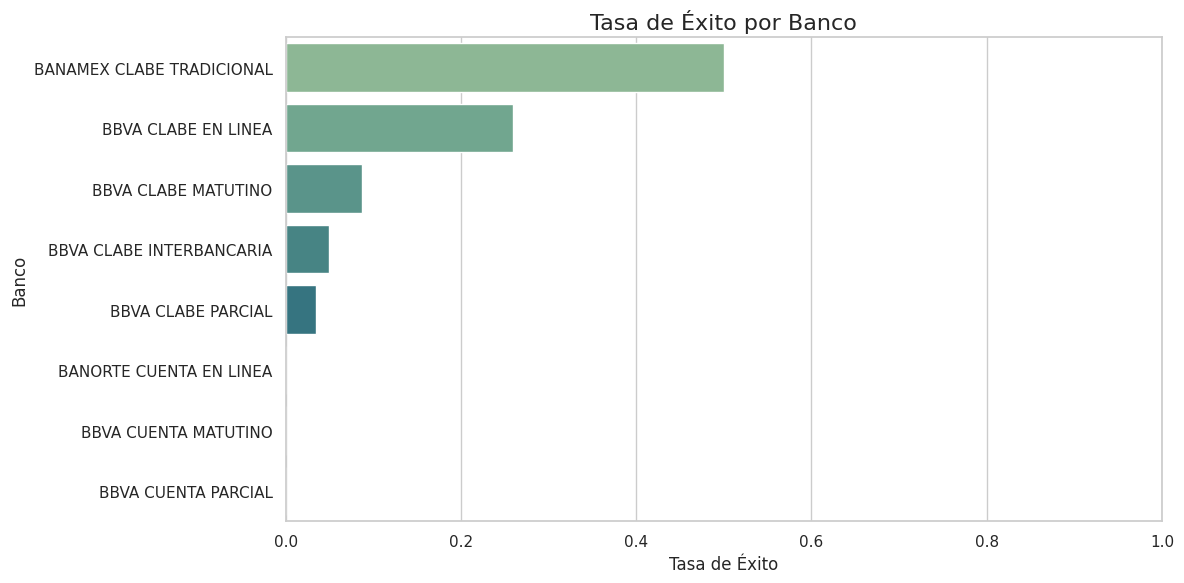

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data_banco = {
    'Nombre': [
        'BANAMEX CLABE TRADICIONAL',
        'BBVA CLABE EN LINEA',
        'BBVA CLABE MATUTINO',
        'BBVA CLABE INTERBANCARIA',
        'BBVA CLABE PARCIAL',
        'BANORTE CUENTA EN LINEA',
        'BBVA CUENTA MATUTINO',
        'BBVA CUENTA PARCIAL'
    ],
    'tasa_exito': [0.5, 0.259306, 0.087393, 0.049658, 0.034631, 0.0, 0.0, 0.0]
}

df_banco = pd.DataFrame(data_banco).sort_values(by='tasa_exito', ascending=False)

# Estilo bonito
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df_banco, x='tasa_exito', y='Nombre', palette='crest')

# Títulos y etiquetas
plt.title('Tasa de Éxito por Banco', fontsize=16)
plt.xlabel('Tasa de Éxito')
plt.ylabel('Banco')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


<ipython-input-3-2c2e03ea9b76>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_envio, x='TipoEnvio', y='tasa_exito', palette='flare')


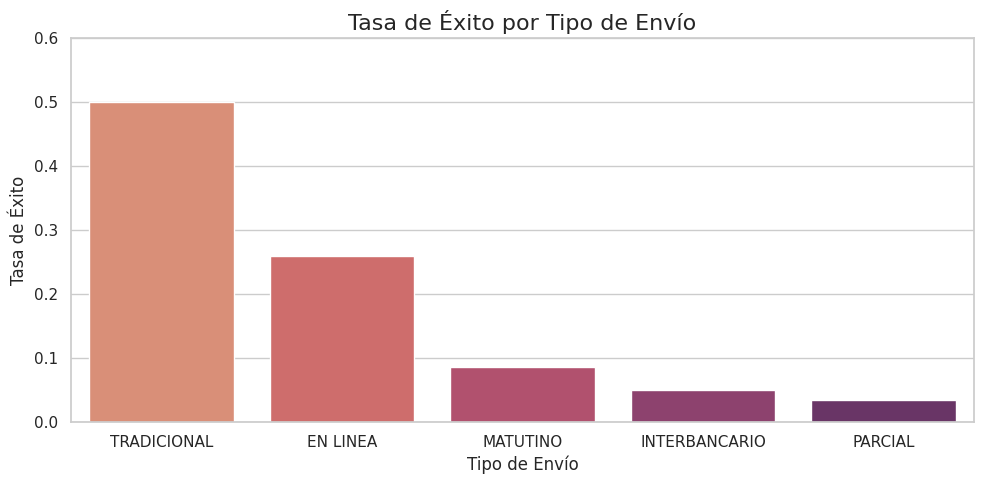

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos
data_envio = {
    'TipoEnvio': ['TRADICIONAL', 'EN LINEA', 'MATUTINO', 'INTERBANCARIO', 'PARCIAL'],
    'tasa_exito': [0.5, 0.259282, 0.085378, 0.049658, 0.034621]
}

df_envio = pd.DataFrame(data_envio).sort_values(by='tasa_exito', ascending=False)

# Estilo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_envio, x='TipoEnvio', y='tasa_exito', palette='flare')

# Títulos y etiquetas
plt.title('Tasa de Éxito por Tipo de Envío', fontsize=16)
plt.xlabel('Tipo de Envío')
plt.ylabel('Tasa de Éxito')
plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()
